In [6]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from celluloid import Camera
import ffmpeg
from scipy import stats
import math

import os
os.chdir(r'C:\Users\Shariq\MechProject')
os.getcwd()

'C:\\Users\\Shariq\\MechProject'

In [2]:
def simulate(horizon):
    '''
    horizon in hours
    Inventory stocks = 100 units (not %)
    deductions in integer units (not %)
    '''
    np.random.seed(0)
    
    if horizon:
        h_i = 100                      #initial level of container
        t_i = 0                     #intial time
        horizon = horizon * 60       #horizon time in minutes
        
        
        del_t_min = 30                  #minimum time interval between two consecutive del_h (= 30 mins)
        del_t_max = 60*2.5              #maximum time interval between two consecutive del_h (= 2.5 hours)
        
        times = [t_i]
        h = [h_i]
        del_hs = []
        del_ts = []
        
        while (h[-1] >= 0) & (times[-1] <= horizon) :
            del_t = np.random.randint(del_t_min, del_t_max)
            del_ts.append(del_t)
            del_h = int(0.1*np.random.uniform()*100) 
            del_h = del_h if del_h != 0 else 1
            del_hs.append(del_h)
            
            if (times[-1] + del_t <= horizon) & (h[-1] - del_h >= 0):
                
                times.append(times[-1] + del_t)
                h.append(h[-1] - del_h )
            
            else: break
                        
#         h = np.array(h)*100
        times = np.array(times) / 60
#         del_hs = np.array(del_hs)*100
        del_ts = np.array(del_ts) / 60
        h = np.round(h, 2); times = np.round(times, 2); del_hs = np.round(del_hs, 2); del_ts = np.round(del_ts, 2)
#         del_hs = np.where(del_hs, del_hs, stats.mode(del_hs))
        ts = np.cumsum(del_ts)
        return h, times, del_hs, del_ts, ts

In [3]:
horizon = 24
h, t, dh, dt, ts = simulate(horizon)
print(len(h), len(t), len(dh), len(dt), len(ts))

17 17 17 17 17


In [61]:
dh

array([5, 6, 8, 6, 2, 9, 4, 5, 3, 0, 6, 8, 8, 4, 4, 6, 6])

In [64]:
dh

array([5, 6, 8, 6, 2, 9, 4, 5, 3, 1, 6, 8, 8, 4, 4, 6, 6])

In [100]:
import math
frac, whole = math.modf(2.5)
frac, whole

0.9 *60

54.0

In [84]:
print(np.vstack([h, t, dh, dt, ts]).T)

[[100.     0.     5.     1.23   1.23]
 [ 95.     1.23   6.     1.57   2.8 ]
 [ 89.     2.8    8.     1.62   4.42]
 [ 81.     4.42   6.     1.88   6.3 ]
 [ 75.     6.3    2.     1.1    7.4 ]
 [ 73.     7.4    9.     1.97   9.37]
 [ 64.     9.37   4.     1.47  10.84]
 [ 60.    10.83   5.     1.15  11.99]
 [ 55.    11.98   3.     1.97  13.96]
 [ 52.    13.95   1.     0.92  14.88]
 [ 51.    14.87   6.     0.65  15.53]
 [ 45.    15.52   8.     1.83  17.36]
 [ 37.    17.35   8.     1.82  19.18]
 [ 29.    19.17   4.     1.87  21.05]
 [ 25.    21.03   4.     1.32  22.37]
 [ 21.    22.35   6.     0.82  23.19]
 [ 15.    23.17   6.     1.15  24.34]]


In [105]:
def plot_rect(sim_fn=simulate, horizon=24):  
    h, t, dh, dt, ts = sim_fn(horizon)
    
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    plt.style.use('seaborn')
    camera = Camera(fig)
    
    # ax.set_xlabel('time')
    ax.set_ylabel('Inventory Level')
    plt.ylim([0,105])
    # timeticks = [x for x in range(25)]
    # ticks = ax.set_xticks(timeticks)
    plt.xlim([-1, 10+1])
    ax.get_xaxis().set_visible(False)
    
    x = t
    y = h

    from matplotlib.patches import Rectangle
    width = 2
    
    for i in range(len(h)):
        ax.hlines(y = y[i], xmin=-1, xmax=width*(1.2), colors='k', linestyles='dashed', label='shariq', lw=1)
#         ax.annotate(text = f'level = {y[i]}%, time = {x[i]} hours , del_h = {dh[i]}%, del_t = {dt[i]} hours', 
#                     xy=(width*(1.2), y[i]))
        ax.annotate(text = f'Current level = {y[i]}', xy=(width*(1.2), y[i]))

        #KANBAN CARD
        minute, hour = math.modf(ts[i])
        
        minute, hour = int(minute*60), int(hour)
    
#         ax.annotate(text = f'Qty Withdrawn = {dh[i]} \nRemaining level = {y[i] - dh[i]} \nWithdrawl Time: {hour}:{minute}',
#                    xy = (6,80)
#                    )
#         rectlabel = Rectangle((6,80), 2.5, 20, fill=True)
#         ax.add_patch(rectlabel)
        ax.text(s=f'Qty Withdrawn = {dh[i]} \nRemaining level = {y[i] - dh[i]} \nWithdrawl Time: {hour}:{minute}',
                x=6, y=80, color='yellow', fontsize=15, backgroundcolor='black')
        
        rect = Rectangle((0,0), width, y[i], fill=True)
        ax.add_patch(rect)
        
        camera.snap()
        
    animation = camera.animate(interval = 1500, repeat = False)
    animation.save('rectangle.html', writer='html')
    return animation

<IPython.core.display.Javascript object>


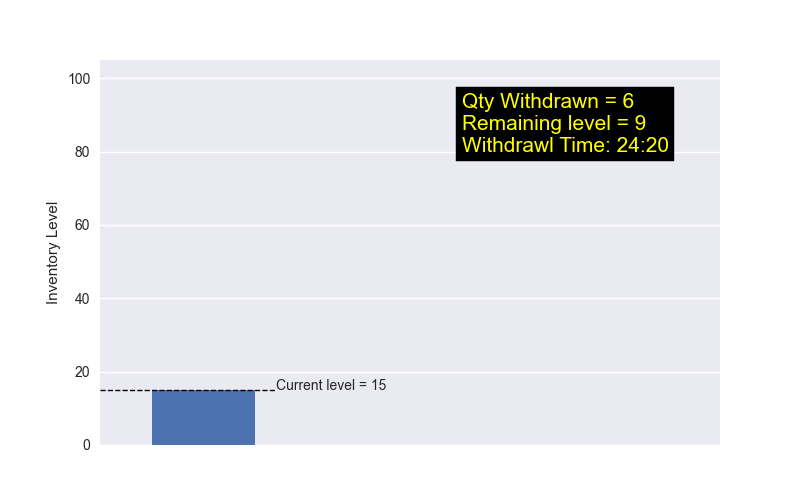

In [106]:
plot_rect()

### rectangle ffmpeg

In [112]:
import subprocess
inputloc = r"C:\Users\Shariq\rectangle_frames\frame%07d.png"
outputloc = r"C:\Users\Shariq\out_cylinder_with_kanban.webm"

frame_rate = 0.75
cmd = f'ffmpeg -framerate {frame_rate} -start_number 0000000 -i "{inputloc}" "{outputloc}"'
print(cmd)
subprocess.check_output(cmd, shell=True)

ffmpeg -framerate 0.75 -start_number 0000000 -i "C:\Users\Shariq\rectangle_frames\frame%07d.png" "C:\Users\Shariq\out_cylinder_with_kanban.webm"


b''

### loading an image

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [103]:
imageloc = r'E:\Paste PD Files Here Only\Shariq_E\Sem 7\Project\kanban_image_from_pdf.png'
img = mpimg.imread(imageloc)
print(img.shape)

(506, 728, 4)


In [35]:
plt.imshow(img)
_=plt.axis('off')

### generate bar codes

In [95]:
import barcode
from barcode.writer import ImageWriter

string = '5901234'
filename = 'newbarcode'
options = {'font_size': 15, 'text_distance':1, 'module_height':10}
bars = barcode.get('code128', string, writer=ImageWriter()) #Enter string as number to be coded
barcodeimage = bars.save(filename, options) #Enter filename; saved as png

#Load image file
barimg = mpimg.imread(filename + '.png')
print(barimg.shape)
fig = plt.Figure()
plt.imshow(barimg)
display(fig)



(184, 272, 3)


<Figure size 640x480 with 0 Axes>

In [64]:
from IPython.display import display
plt.imshow(img)

<IPython.core.display.Javascript object>


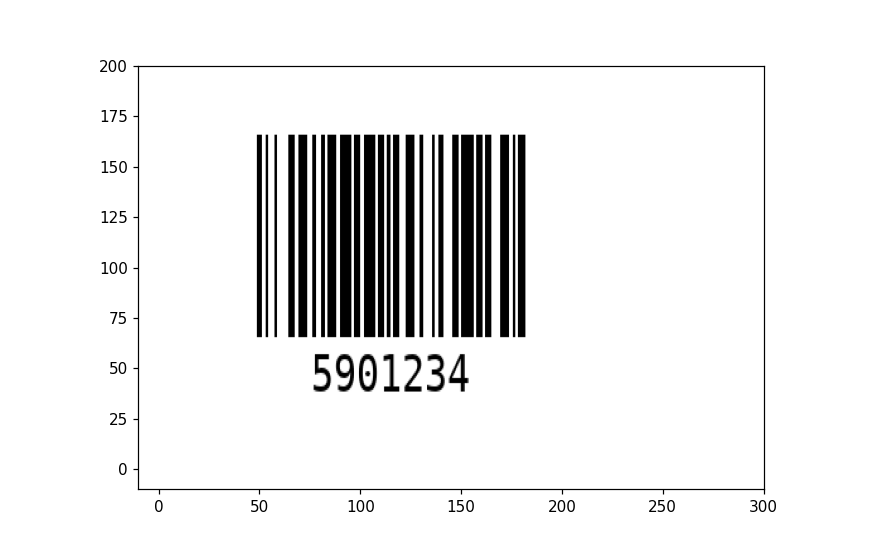

In [96]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
# plt.grid('off')
# ax.set_axis_off()
ax.set_xlim([-10, 300])
ax.set_ylim([-10, 200])
ax.imshow(barimg, origin='upper', extent=[30, 200, 20, 175])
# plt.axis([-10, 300, -10, 200])


### plot rect with kanban

In [122]:
def plot_rect_kanban(sim_fn=simulate, horizon=24):  
    h, t, dh, dt, ts = sim_fn(horizon)
    
    kanbancardloc = r'E:\Paste PD Files Here Only\Shariq_E\Sem 7\Project\kanban_image_from_pdf.png'
    kanbancard = mpimg.imread(kanbancardloc)
    
    
#     fig = plt.figure(figsize=(8,5))
    fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]}, figsize=(8,5))
    
    ax = axs[0]
    ax2 = axs[1]
#     plt.style.use('seaborn')
    
    camera = Camera(fig)
    
    # ax.set_xlabel('time')
    ax.set_ylabel('Inventory Level')
    ax.set_ylim([0,105])
    # timeticks = [x for x in range(25)]
    # ticks = ax.set_xticks(timeticks)
    ax.set_xlim([0, 2])
    ax.get_xaxis().set_visible(False)
#     ax2.set_axis_off()
    ax2.set_xlim([0,728])
    ax2.set_ylim([506, 0])
    ax2.grid('True')
    
    x = t
    y = h

    from matplotlib.patches import Rectangle
    width = 1.5
    lowerleft = 0.25
    
    for i in range(len(h)):
        
        #RECTANGLE
        rect = Rectangle((lowerleft,0), width, y[i], fill=True)
        ax.add_patch(rect)
        
        ax.hlines(y = y[i], xmin=0, xmax=width+lowerleft, colors='k', linestyles='dashed', label='current_level', lw=1)
#         ax.annotate(text = f'level = {y[i]}%, time = {x[i]} hours , del_h = {dh[i]}%, del_t = {dt[i]} hours', 
#                     xy=(width*(1.2), y[i]))
        ax.annotate(text = f'Current level = {y[i]}', xy=(lowerleft, y[i]+1))

        camera.snap()
        
        #KANBAN CARD
        minute, hour = math.modf(ts[i])
        
        minute, hour = int(minute*60), int(hour)
    
#         ax.annotate(text = f'Qty Withdrawn = {dh[i]} \nRemaining level = {y[i] - dh[i]} \nWithdrawl Time: {hour}:{minute}',
#                    xy = (6,80)
#                    )
#         rectlabel = Rectangle((6,80), 2.5, 20, fill=True)
#         ax.add_patch(rectlabel)

#         ax.text(s=f'Qty Withdrawn = {dh[i]} \nRemaining level = {y[i] - dh[i]} \nWithdrawl Time: {hour}:{minute}',
#                 x=6, y=80, color='yellow', fontsize=15, backgroundcolor='black')
        ax2.imshow(kanbancard)
        ax2.imshow(barimg, extent=[270, 475, 500, 330 ])
        ax2.text(s=f'{dh[i]}  ', x=495, y=160,
                 fontsize=13, color='black', backgroundcolor='white')
        ax2.text(s=f'Withdrawl At: 12/4/2020 {hour}:{minute}:00 \n\nRemaining Qty: {y[i] - dh[i]}',
                 x=20, y=290,
                 fontsize=12, color='black', backgroundcolor='white')
#         ax2.text(s=f'Remaining Qty: {y[i] - dh[i]}', x=20, y=260,
#                  fontsize=10, color='black', backgroundcolor='white')
        #RECTANGLE
        rect = Rectangle((lowerleft,0), width, y[i], fill=True)
        ax.add_patch(rect)
        
        ax.hlines(y = y[i], xmin=0, xmax=width+lowerleft, colors='k', linestyles='dashed', label='current_level', lw=1)
#         ax.annotate(text = f'level = {y[i]}%, time = {x[i]} hours , del_h = {dh[i]}%, del_t = {dt[i]} hours', 
#                     xy=(width*(1.2), y[i]))
        ax.annotate(text = f'Current level = {y[i]}', xy=(lowerleft, y[i]+1))
        camera.snap()
        
    animation = camera.animate(interval = 1500, repeat = False)
    animation.save('rectangle_with_kanban.html', writer='html')
    return animation


<IPython.core.display.Javascript object>


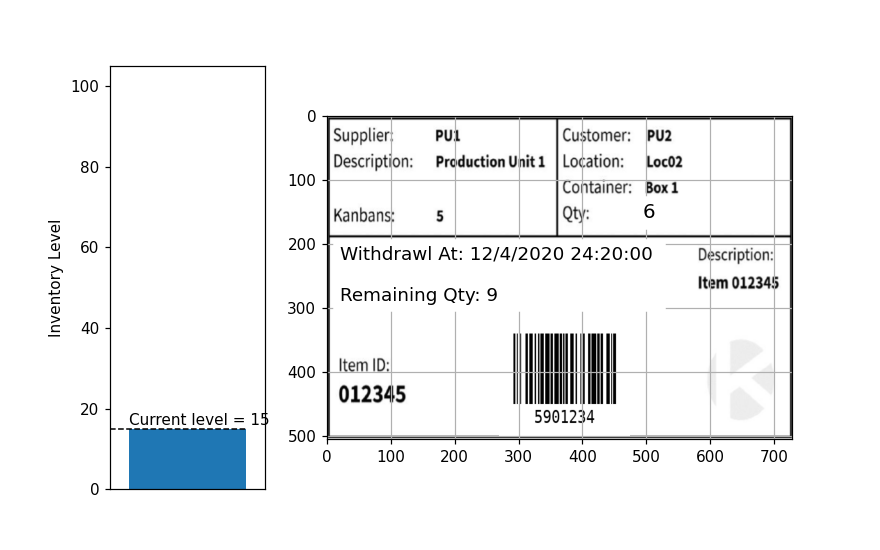

In [123]:
plot_rect_kanban()

In [83]:
import subprocess
inputloc = r"C:\Users\Shariq\rectangle_with_kanban_frames\frame%07d.png"
outputloc = r"C:\Users\Shariq\out_cylinder_with_kanban2.webm"

frame_rate = 0.75
cmd = f'ffmpeg -framerate {frame_rate} -start_number 0000000 -i "{inputloc}" "{outputloc}"'
print(cmd)
subprocess.check_output(cmd, shell=True)

ffmpeg -framerate 0.75 -start_number 0000000 -i "C:\Users\Shariq\rectangle_with_kanban_frames\frame%07d.png" "C:\Users\Shariq\out_cylinder_with_kanban2.webm"


b''